In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import random
import pickle5 as pickle

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import *

In [2]:
# load data
with open('../../WM-clean.pkl', "rb") as fh:
    raw_data = pickle.load(fh)
print(f'Raw data shape: {raw_data.shape}')

# remove test set
data = raw_data[raw_data.dataset != 'test'].reset_index(drop=True)
print(f'Train/dev data shape: {data.shape}')
#data.head()

Raw data shape: (172950, 11)
Train/dev data shape: (147007, 11)


In [3]:
# calculate density of dies in wafer map
# as represented by nonzero elements
def wafer_density(row, col, x, y):
    nonzeros = np.count_nonzero(row[col])
    pixels = row[x] * row[y]
    return nonzeros/pixels

data['density'] = data.apply (lambda row: wafer_density(row, 'waferMap', 'x_', 'y_'), axis=1)

# create a dictionary of the max density for each lot
# assume that this represents the full uncorrupted wafer map
lot_density = data.groupby('lotName').density.max().to_dict()

# what percentage of density is missing, if any?
def missing_density(row, lot, density, dictionary):
    missing_pct = (dictionary[row[lot]] - row[density]) / dictionary[row[lot]]
    return missing_pct

data['missing_density'] = data.apply (lambda row: missing_density(row, 'lotName', 'density', lot_density), axis=1)

In [4]:
data.failureType.unique()

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Scratch', 'Near-full',
       'Random', 'Edge-Ring', 'Donut'], dtype=object)

In [10]:
filter_size=7
fig_size = [8, 8]
random.seed(424)
number = 9

In [7]:
good = [81093, 23883, 146546, 21963, 21504, 81735, 14937, 8777, 17502]
bad = [84792, 19099, 71986, 23280, 123406, 98254, 98185, 17960, 105729]

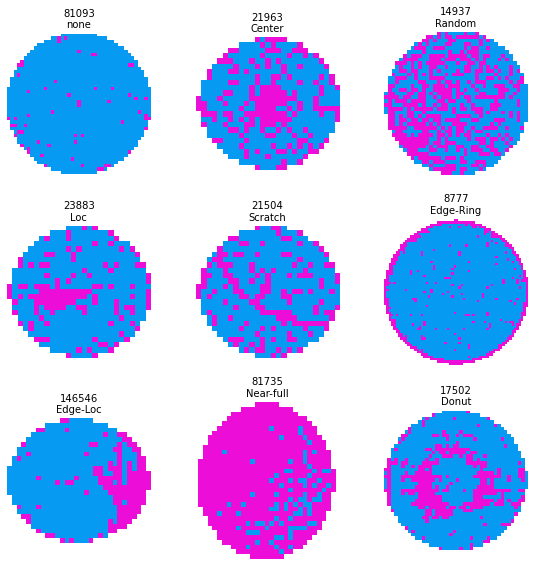

In [15]:
plot_list(data, good, fig_size)

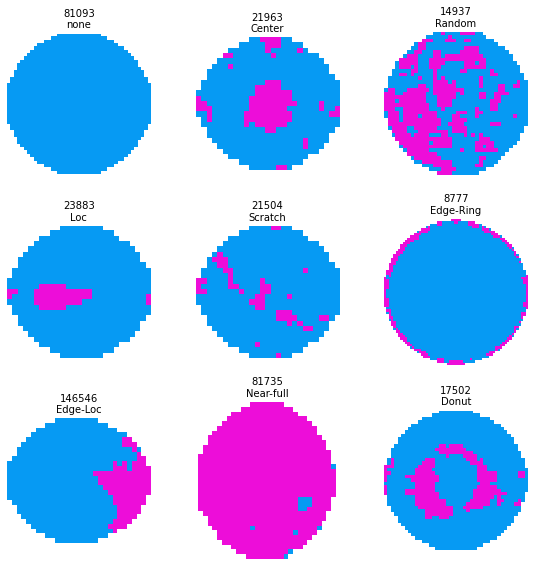

In [16]:
plot_list(data, good, fig_size, filter_size, True)

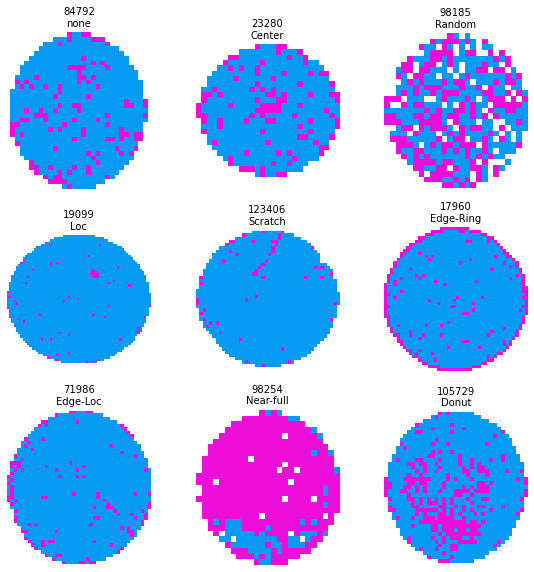

In [8]:
plot_list(data, bad, fig_size)

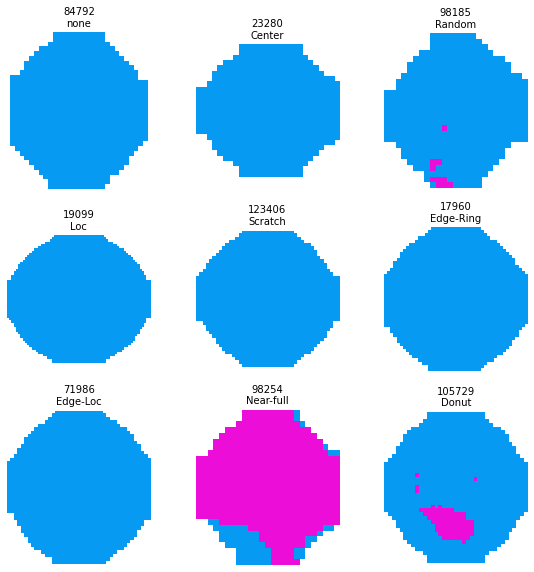

In [11]:
plot_list(data, bad, fig_size, filter_size, True)

none count: 125316


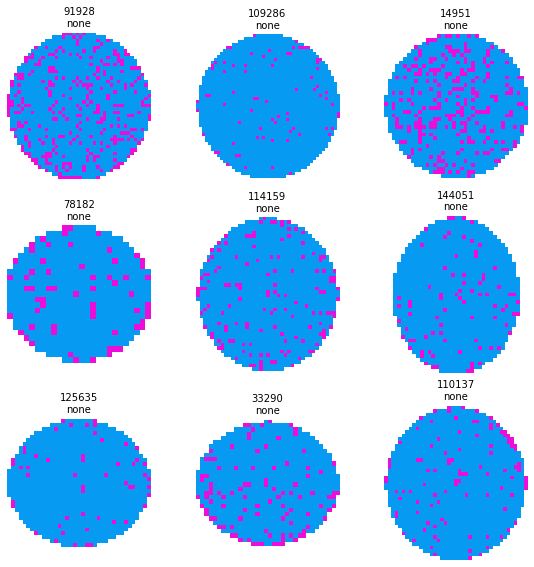

In [17]:
none = data.index[data['failureType'] == 'none'].tolist()
print(f'none count: {len(none)}')
random_none = random.sample(none, number)

plot_list(data, random_none, fig_size)

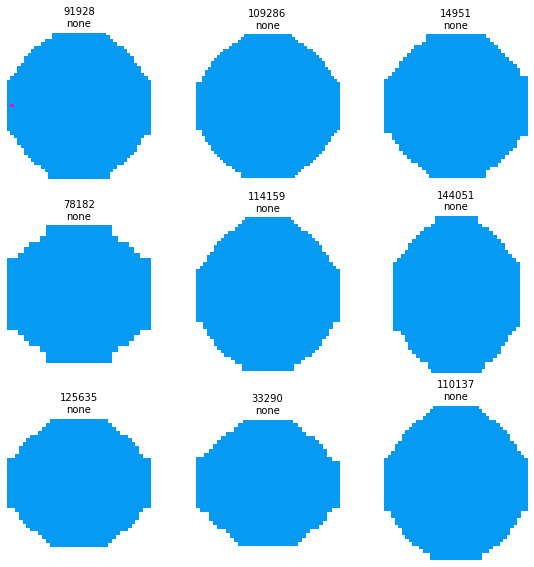

In [12]:
plot_list(data, random_none, fig_size, filter_size, True)

Loc count: 3054


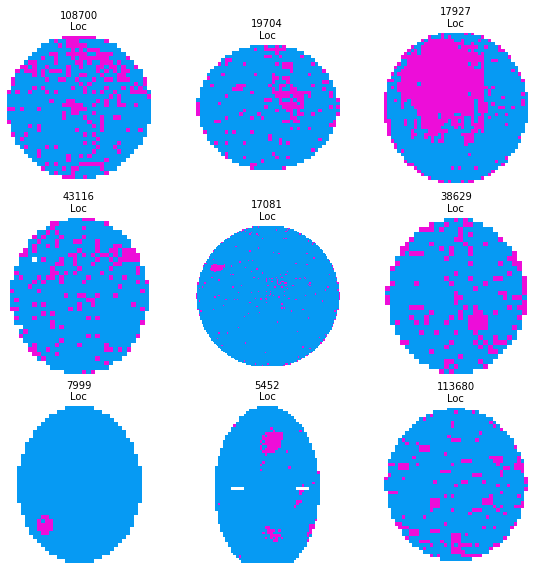

In [18]:
loc = data.index[data['failureType'] == 'Loc'].tolist()
print(f'Loc count: {len(loc)}')
random_loc = random.sample(loc, number)

plot_list(data, random_loc, fig_size)

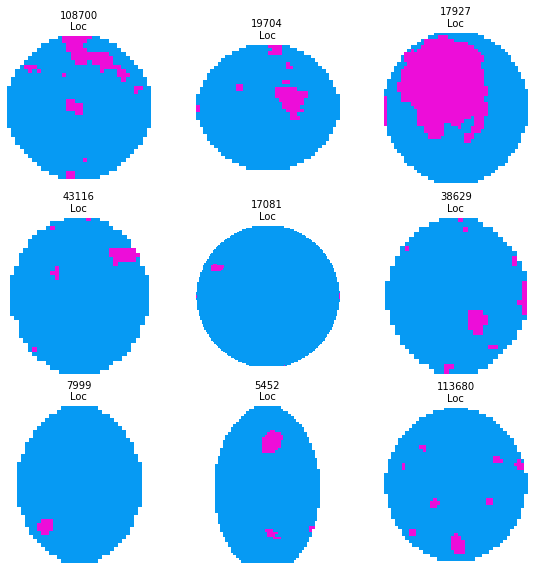

In [19]:
plot_list(data, random_loc, fig_size, filter_size, True)

Edge-Loc count: 4410


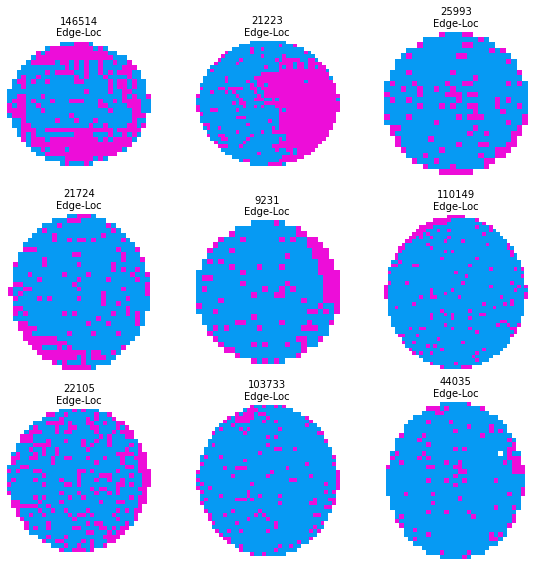

In [20]:
edgeloc = data.index[data['failureType'] == 'Edge-Loc'].tolist()
print(f'Edge-Loc count: {len(edgeloc)}')
random_edgeloc = random.sample(edgeloc, number)

plot_list(data, random_edgeloc, fig_size)

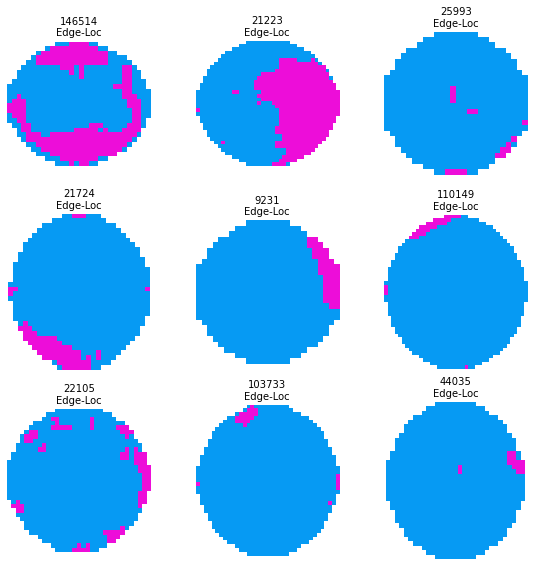

In [21]:
plot_list(data, random_edgeloc, fig_size, filter_size, True)

Center count: 3650


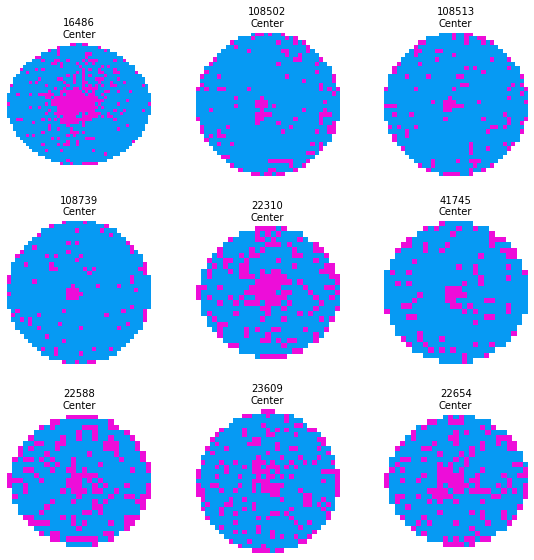

In [22]:
center = data.index[data['failureType'] == 'Center'].tolist()
print(f'Center count: {len(center)}')
random_center = random.sample(center, number)

plot_list(data, random_center, fig_size)

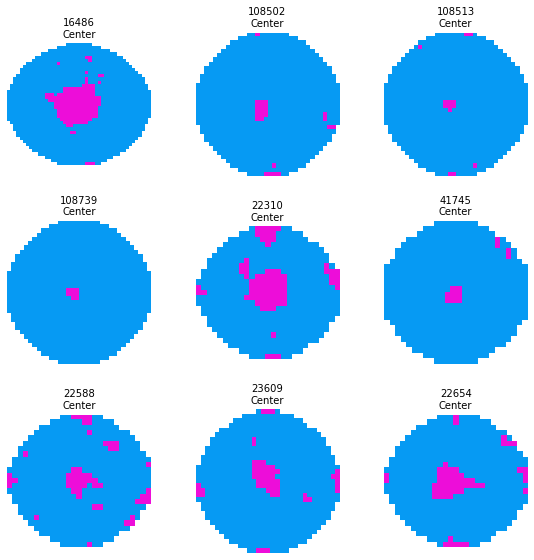

In [23]:
plot_list(data, random_center, fig_size, filter_size, True)

Scratch count: 1014


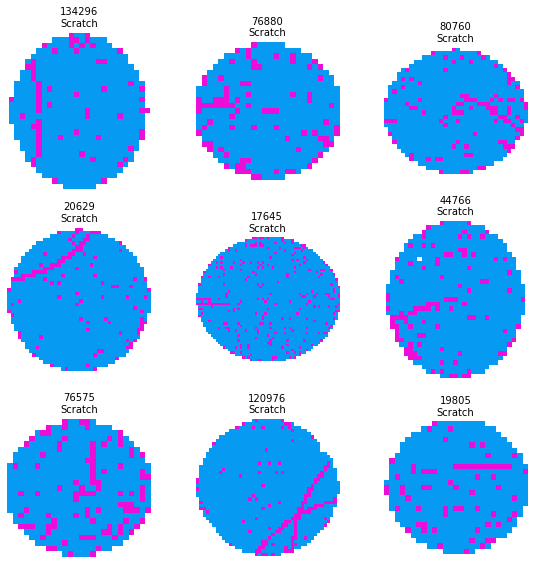

In [28]:
scratch = data.index[data['failureType'] == 'Scratch'].tolist()
print(f'Scratch count: {len(scratch)}')
random_scratch = random.sample(scratch, number)

plot_list(data, random_scratch, fig_size)

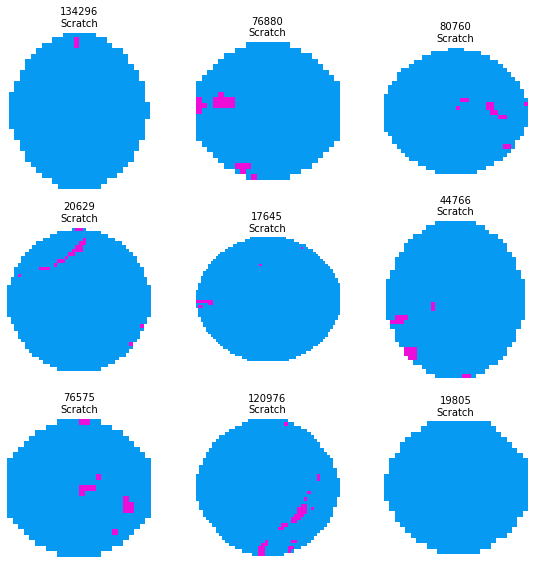

In [29]:
plot_list(data, random_scratch, fig_size, filter_size, True)

Near-full count: 127


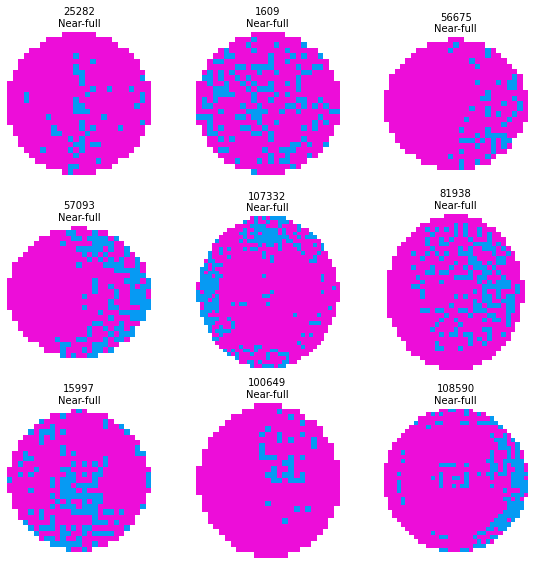

In [30]:
nearfull = data.index[data['failureType'] == 'Near-full'].tolist()
print(f'Near-full count: {len(nearfull)}')
random_nearfull = random.sample(nearfull, number)

plot_list(data, random_nearfull, fig_size)

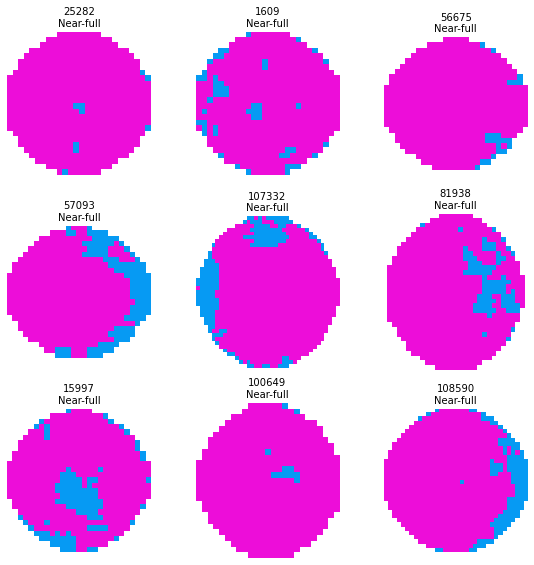

In [31]:
plot_list(data, random_nearfull, fig_size, filter_size, True)

Random count: 736


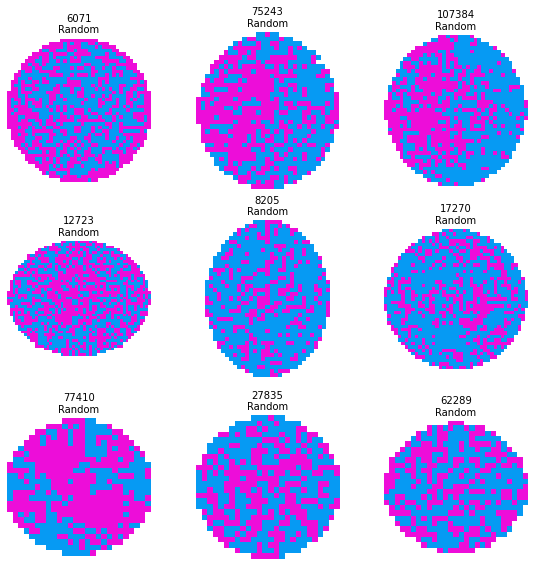

In [32]:
rand = data.index[data['failureType'] == 'Random'].tolist()
print(f'Random count: {len(rand)}')
random_rand = random.sample(rand, number)

plot_list(data, random_rand, fig_size)

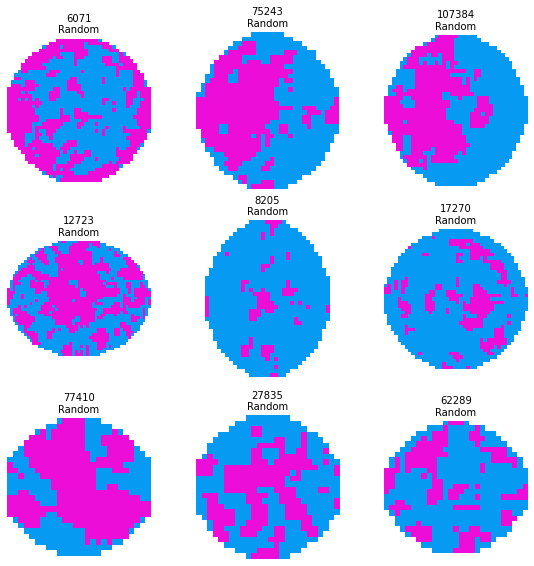

In [33]:
plot_list(data, random_rand, fig_size, filter_size, True)

Edge-Ring count: 8228


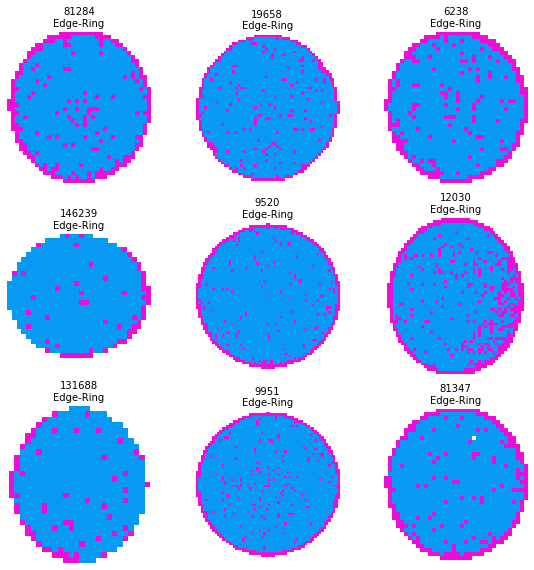

In [34]:
edgering = data.index[data['failureType'] == 'Edge-Ring'].tolist()
print(f'Edge-Ring count: {len(edgering)}')
random_edgering = random.sample(edgering, number)

plot_list(data, random_edgering, fig_size)

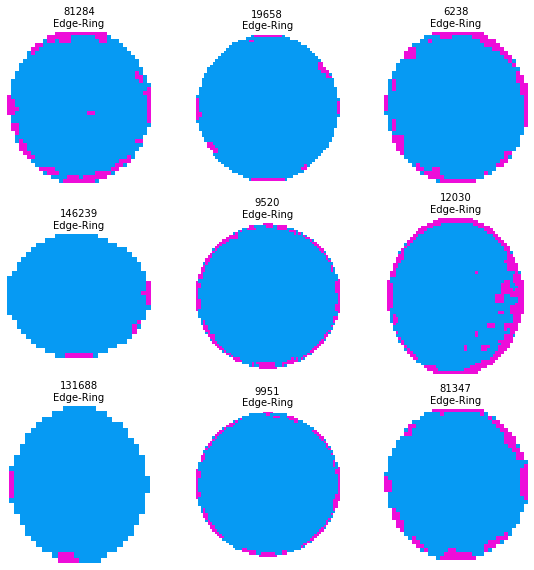

In [35]:
plot_list(data, random_edgering, fig_size, filter_size, True)

Donut count: 472


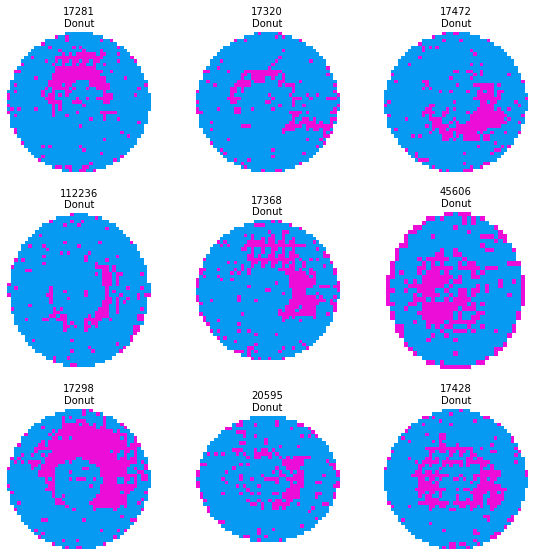

In [36]:
donut = data.index[data['failureType'] == 'Donut'].tolist()
print(f'Donut count: {len(donut)}')
random_donut = random.sample(donut, number)

plot_list(data, random_donut, fig_size)

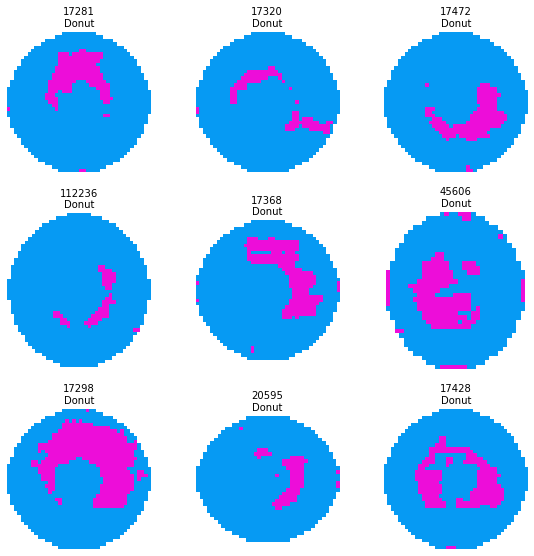

In [37]:
plot_list(data, random_donut, fig_size, filter_size, True)

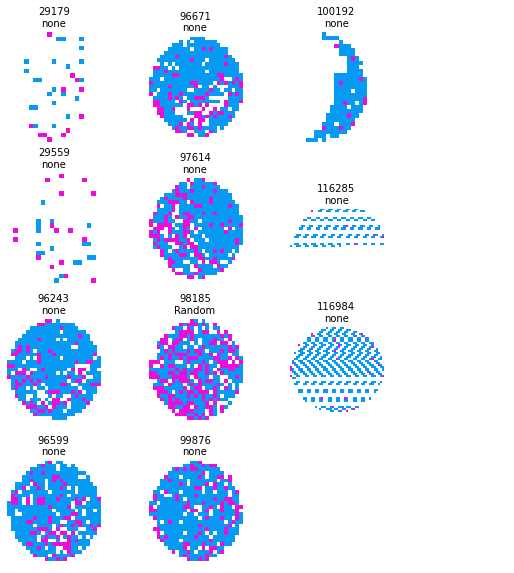

In [38]:
most_corrupted = data.index[data['missing_density'] >= 0.1].tolist()
plot_list(data, most_corrupted, fig_size=[8,8])

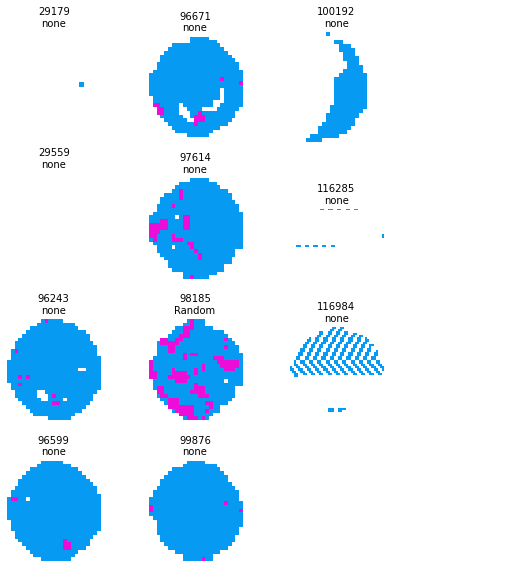

In [39]:
plot_list(data, most_corrupted, fig_size=[8,8], mfilter=True, filter_size=filter_size)

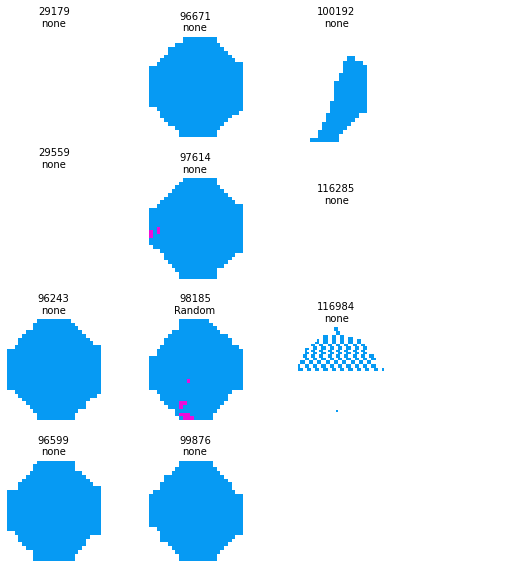

In [40]:
plot_list(data, most_corrupted, fig_size=[8,8], mfilter=True, filter_size=7)